In [ ]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [ ]:
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'Final_Dataset/TrainData'
validation_data_dir = 'Final_Dataset/ValData'
nb_train_samples = 4590 
nb_validation_samples = 1800 
batch_size = 16

In [ ]:
Apple_list = ['Mature','Premature','Rotten']

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 4590 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 1800 images belonging to 3 classes.


In [ ]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)


87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

In [ ]:
model = Model(inputs=inception.input, outputs=predictions)

In [ ]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='Final_Dataset/best_model.hdf5', verbose=1, save_best_only=True)

In [ ]:
csv_logger = CSVLogger('Final_Dataset/history.log')


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])


286/286 [==============================] - ETA: 0s - loss: 0.6323 - accuracy: 0.7862
Epoch 00001: val_loss improved from inf to 0.31596, saving model to /content/drive/My Drive/Final_Dataset/best_model.hdf5
286/286 [==============================] - 3216s 11s/step - loss: 0.6323 - accuracy: 0.7862 - val_loss: 0.3160 - val_accuracy: 0.9498
Epoch 2/30
286/286 [==============================] - ETA: 0s - loss: 0.2735 - accuracy: 0.9309
Epoch 00002: val_loss improved from 0.31596 to 0.16606, saving model to /content/drive/My Drive/Final_Dataset/best_model.hdf5
286/286 [==============================] - 127s 444ms/step - loss: 0.2735 - accuracy: 0.9309 - val_loss: 0.1661 - val_accuracy: 0.9732
Epoch 3/30
286/286 [==============================] - ETA: 0s - loss: 0.1845 - accuracy: 0.9528
Epoch 00003: val_loss improved from 0.16606 to 0.11412, saving model to /content/drive/My Drive/Final_Dataset/best_model.hdf5
286/286 [==============================] - 125s 437ms/step - loss: 0.1845 - accu

In [ ]:
model.save('Final_Dataset/model_saved.hdf5')

In [ ]:
class_map_3 = train_generator.class_indices
class_map_3

{'Mature': 0, 'Premature': 1, 'Rotten': 2}

In [ ]:
# list all data in history.
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


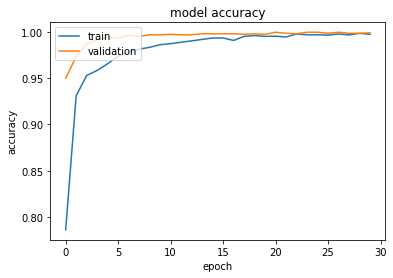

In [ ]:
# summarize history for accuracy.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

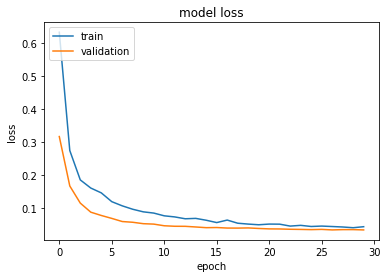

In [ ]:
# summarize history for loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
plt.show()
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Mature', 'Premature', 'Rotten']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Confusion Matrix
[[148 148 204]
 [156 190 236]
 [195 246 277]]
Classification Report
              precision    recall  f1-score   support

      Mature       0.30      0.30      0.30       500
   Premature       0.33      0.33      0.33       582
      Rotten       0.39      0.39      0.39       718

    accuracy                           0.34      1800
   macro avg       0.34      0.34      0.34      1800
weighted avg       0.34      0.34      0.34      1800



In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
  import matplotlib.pyplot as plt
    #import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

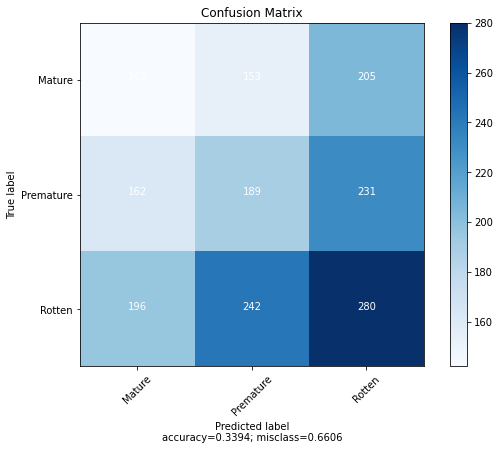

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 142,  153,   205],
                                              [  162,  189,  231],
                                              [  196,  242, 280]]), 
                      normalize    = False,
                      target_names = ['Mature', 'Premature','Rotten'],
                      title        = "Confusion Matrix")

In [ ]:
%%time
# Loading the best saved model to make predictions
#K.clear_session()
model_best = load_model('Final_Dataset/best_model_3class.hdf5',compile = False)

CPU times: user 5.66 s, sys: 231 ms, total: 5.89 s
Wall time: 5.96 s


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________